In [233]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Replace 'your_file.xlsx' with the path to your Excel file
sales_data = 'sales data.xlsx'

# Read the Excel file into a pandas DataFrame
final_df = pd.read_excel(sales_data)

# Now you can work with the DataFrame 'df'
final_df.head()  # Display the first few rows of the DataFrame



,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,6/26/2019,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,10/22/2019,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


In [478]:
# Create a pivot table with median sales, median cost, and purchase frequency by customers
pivot_table = final_df.pivot_table(
                              index='customer_name', 
                              values=['order_value_EUR', 'cost'], 
                              aggfunc={'order_value_EUR': 'median', 'cost': 'median', 'customer_name': 'count'})

# Rename the 'Customer' column to 'Purchase Frequency'
pivot_table.columns=['Median Cost', 'Count', 'Median Sales']


In [479]:
# Print the pivot table
print(pivot_table)

                    Median Cost  Count  Median Sales
customer_name                                       
Hegmann Group         115708.14      1  1.403373e+05
Kirlin and Sons       249788.24      2  5.009896e+07
Konopelski LLC         77722.25      1  9.832037e+04
Labadie and Sons      110924.13      1  1.270754e+05
Romaguera-Dietrich     55529.13      3  6.968143e+04
Schoen-Keeling         56032.84      1  6.397904e+04
Wisoky Inc             40319.41      1  4.629626e+04


In [480]:
sorted_pivot_table = pivot_table.sort_values(by = 'Count', ascending=False)

In [481]:
sorted_pivot_table

,Median Cost,Count,Median Sales
customer_name,,,
Romaguera-Dietrich,55529.13,3,6.968143e+04
Kirlin and Sons,249788.24,2,5.009896e+07
Hegmann Group,115708.14,1,1.403373e+05
Konopelski LLC,77722.25,1,9.832037e+04
Labadie and Sons,110924.13,1,1.270754e+05
Schoen-Keeling,56032.84,1,6.397904e+04
Wisoky Inc,40319.41,1,4.629626e+04


In [482]:
# sort by range
top_4 = sorted_pivot_table[0:4]
top_4

,Median Cost,Count,Median Sales
customer_name,,,
Romaguera-Dietrich,55529.13,3,6.968143e+04
Kirlin and Sons,249788.24,2,5.009896e+07
Hegmann Group,115708.14,1,1.403373e+05
Konopelski LLC,77722.25,1,9.832037e+04


In [483]:
top_4.index

Index(['Romaguera-Dietrich', 'Kirlin and Sons', 'Hegmann Group',
       'Konopelski LLC'],
      dtype='object', name='customer_name')

In [484]:

# List of special customer names
loyal_customer_names = ['Romaguera-Dietrich', 'Kirlin and Sons', 'Hegmann Group', 'Konopelski LLC']

# Function to assign customer type
def customer_type(name):
    if name in loyal_customer_names:
        return 'Loyal customer'
    else:
        return 'Regular customer'

# Assigning new variable 'customer_type'
final_df['customer_type'] = final_df['customer_name'].apply(customer_type)

In [485]:
final_df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,customer_type,Customer_Type_encoded
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,Loyal customer,1
1,France,46296.26,40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,Regular customer,0
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,Loyal customer,1
3,France,203604.46,175344.16,6/26/2019,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,Loyal customer,1
4,UK,63979.04,56032.84,10/22/2019,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,Regular customer,0


In [486]:
final_df['customer_type'].value_counts()

customer_type
Loyal customer      7
Regular customer    3
Name: count, dtype: int64

In [487]:
# Give me a python code to extract day, month and a year form date variable in a dataframe

In [488]:
# Give me a python code to assign 1 for "loyal customer" and 0 for "regular customer" in a variable CustomerType in a dataframe

In [489]:
final_df['Customer_Type_encoded'] = final_df['customer_type'].replace({'Loyal customer': 1, 'Regular customer': 0})

C:\Users\Gennie\AppData\Local\Temp\ipykernel_23520\57327186.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df['Customer_Type_encoded'] = final_df['customer_type'].replace({'Loyal customer': 1, 'Regular customer': 0})


In [490]:
final_df.head(5)


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,customer_type,Customer_Type_encoded
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,Loyal customer,1
1,France,46296.26,40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,Regular customer,0
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,Loyal customer,1
3,France,203604.46,175344.16,6/26/2019,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,Loyal customer,1
4,UK,63979.04,56032.84,10/22/2019,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,Regular customer,0


In [491]:
# give me a python code to create a new dummy var for the variables country, category, device_type in a dataframe

In [492]:
# Create dummy variables for multiple categorical variables
prep_df = pd.get_dummies(final_df, columns=['country', 'category', 'device_type'], dtype=int)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([final_df, prep_df], axis=1)

In [493]:
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,...,country_Sweden,country_UK,category_Appliances,category_Clothing,category_Electronics,category_Games,device_type_MAC,device_type_Mobile,device_type_PC,device_type_Tablet
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,...,1,0,0,0,0,1,0,0,0,1
1,France,46296.26,40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,...,0,0,0,0,0,1,0,0,0,1
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,...,0,0,1,0,0,0,0,0,1,0
3,France,203604.46,175344.16,6/26/2019,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,...,0,0,0,0,1,0,0,1,0,0
4,UK,63979.04,56032.84,10/22/2019,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,...,0,1,0,0,0,1,0,0,1,0


In [494]:
y=prep_df['cost']

In [495]:
y

0     77722.25
1     40319.41
2    115708.14
3    175344.16
4     56032.84
5    110924.13
6     55529.13
7     55529.13
8     55529.13
9    324232.32
Name: cost, dtype: float64

In [496]:
prep_df.columns

Index(['order_value_EUR', 'cost', 'date', 'customer_name', 'sales_manager',
       'sales_rep', 'order_id', 'customer_type', 'Customer_Type_encoded',
       'country_France', 'country_Italy', 'country_Korea', 'country_Portugal',
       'country_Sweden', 'country_UK', 'category_Appliances',
       'category_Clothing', 'category_Electronics', 'category_Games',
       'device_type_MAC', 'device_type_Mobile', 'device_type_PC',
       'device_type_Tablet'],
      dtype='object')

In [497]:
# give me a python code to drop 5 categorical variables from a dataframe

In [498]:
# List of categorical variables to drop
categorical_vars_to_drop = [  'customer_type', 'Customer_Type_encoded',
       'country_France', 'country_Italy', 'country_Korea', 'country_Portugal',
       'country_Sweden', 'country_UK', 'category_Appliances',
       'category_Clothing', 'category_Electronics', 'category_Games',
       'device_type_MAC', 'device_type_Mobile', 'device_type_PC',
       'device_type_Tablet', 'date', 'customer_name', 'sales_manager', 'sales_rep', 'order_id']

# Drop the categorical variables from the DataFrame
x = prep_df.drop(columns=categorical_vars_to_drop, axis=1)
x


,order_value_EUR,cost
0,98320.37,77722.25
1,46296.26,40319.41
2,140337.34,115708.14
3,203604.46,175344.16
4,63979.04,56032.84
5,127075.41,110924.13
6,69681.43,55529.13
7,69681.43,55529.13
8,69681.43,55529.13
9,99994324.23,324232.32


In [499]:
x.columns

Index(['order_value_EUR', 'cost'], dtype='object')

In [500]:
# give me a python code to scale a dataframe with standardscaler.

In [501]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_data = scaler.fit_transform(x)
x


,order_value_EUR,cost
0,98320.37,77722.25
1,46296.26,40319.41
2,140337.34,115708.14
3,203604.46,175344.16
4,63979.04,56032.84
5,127075.41,110924.13
6,69681.43,55529.13
7,69681.43,55529.13
8,69681.43,55529.13
9,99994324.23,324232.32


In [502]:
scaled_data

array([[-0.33334695, -0.35176779],
       [-0.3350829 , -0.80601252],
       [-0.33194493,  0.10955789],
       [-0.32983382,  0.83381702],
       [-0.33449286, -0.61517828],
       [-0.33238745,  0.05145772],
       [-0.33430258, -0.62129566],
       [-0.33430258, -0.62129566],
       [-0.33430258, -0.62129566],
       [ 2.99999666,  2.64201294]])

In [503]:
from sklearn.model_selection import train_test_split

In [504]:

# Assuming you have your data stored in variables x and y

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(scaled_data, y, test_size=0.2, random_state=42)



In [505]:
train_x

array([[-0.33238745,  0.05145772],
       [-0.33334695, -0.35176779],
       [-0.33430258, -0.62129566],
       [-0.33194493,  0.10955789],
       [ 2.99999666,  2.64201294],
       [-0.33449286, -0.61517828],
       [-0.32983382,  0.83381702],
       [-0.33430258, -0.62129566]])

In [506]:
test_x

array([[-0.33430258, -0.62129566],
       [-0.3350829 , -0.80601252]])

In [507]:
train_y

5    110924.13
0     77722.25
7     55529.13
2    115708.14
9    324232.32
4     56032.84
3    175344.16
6     55529.13
Name: cost, dtype: float64

In [508]:
test_y

8    55529.13
1    40319.41
Name: cost, dtype: float64

In [509]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [510]:
# Give me a python code build Linear Regression ML modelon train data, 
# make prediction on test data, measure accuracy with MAPE, a plot to visualize y_pred against test_y
# and kde plot to visualize the disturbution of a residual

In [511]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [512]:
# Train linear regression model
model = LinearRegression()

# Train (fit) the model z
model.fit(train_x, train_y)

# Make predictions of the test data
y_pred = model.predict(test_x)

In [513]:
import numpy as np

In [514]:
# Define a function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(test_y, y_pred):
    return np.mean(np.abs((test_y - y_pred) / test_y)) * 100
# Calculating the Mean Absolute Percentage Error (MAPE) using the custom function
mape = calculate_mape(test_y, y_pred)


In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

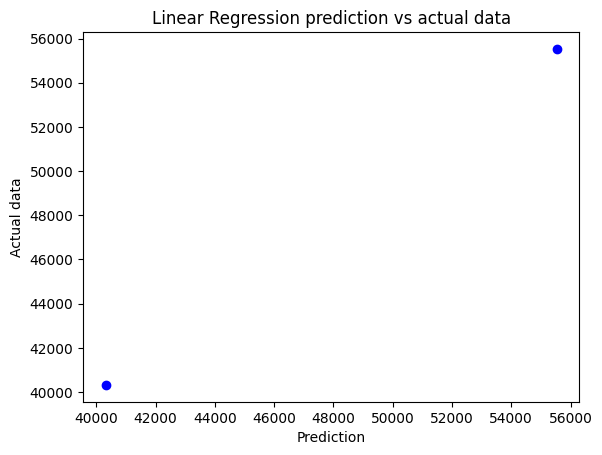

In [516]:
plt.scatter(y_pred, test_y, color="blue")
plt.xlabel('Prediction')
plt.ylabel('Actual data')
plt.title('Linear Regression prediction vs actual data')
plt.show()

In [517]:
# pip install seaborn
import seaborn as sns

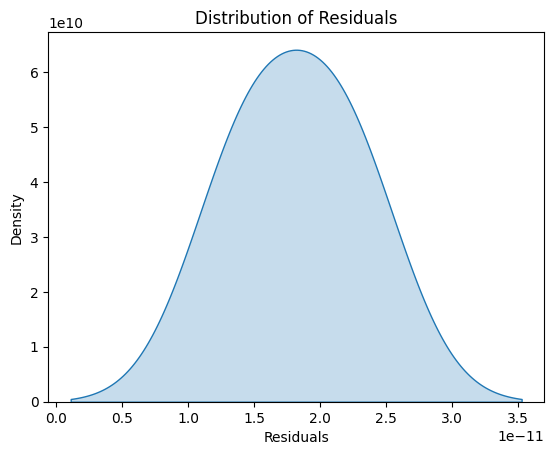

In [518]:
# Plot KDE of residuals
residentuals=test_y - y_pred
sns.kdeplot(residentuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [519]:
# print MAPE
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 0.00%


In [520]:
'''
Give me a python code build decision tree regressor ml model on traindata, make prediction on test data, measure
accuracy with MAPE, a plot to visualize y_pred against test_y, and a kde plot to visualize the disturbution of a residual

'''

'\nGive me a python code build decision tree regressor ml model on traindata, make prediction on test data, measure\naccuracy with MAPE, a plot to visualize y_pred against test_y, and a kde plot to visualize the disturbution of a residual\n\n'

In [521]:
from sklearn.tree import DecisionTreeRegressor

In [522]:
# Building decision tree regressor model
model_decTree= DecisionTreeRegressor()
model_decTree.fit(train_x, train_y)

# Making predictions on test data
y_pred_decTree = model_decTree.predict(test_x)

In [523]:
# line 52
mape_decTree = calculate_mape(test_y, y_pred_decTree)

In [524]:
mape_decTree

18.861535920292475

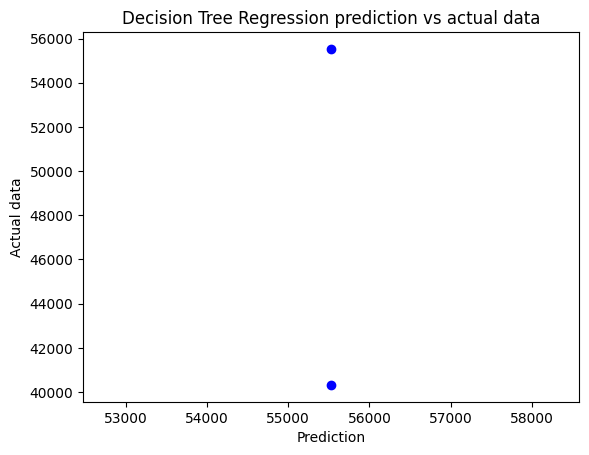

In [525]:
plt.scatter(y_pred_decTree, test_y, color="blue")
plt.xlabel('Prediction')
plt.ylabel('Actual data')
plt.title('Decision Tree Regression prediction vs actual data')
plt.show()

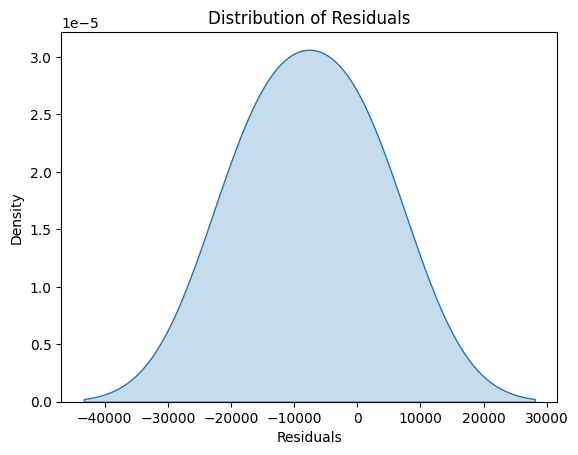

In [526]:
# Plot KDE of residuals
decTree_residentual=test_y - y_pred_decTree
sns.kdeplot(decTree_residentual, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [527]:
# print MAPE
print(f"Mean Absolute Percentage Error (MAPE): {mape_decTree:.2f}%")

Mean Absolute Percentage Error (MAPE): 18.86%


In [528]:
'''
Give me a python code build Random Forest Regressor  ml model on traindata, make prediction on test data, measure
accuracy with MAPE, a plot to visualize y_pred against test_y, and a kde plot to visualize the disturbution of a residual

'''

'\nGive me a python code build Random Forest Regressor  ml model on traindata, make prediction on test data, measure\naccuracy with MAPE, a plot to visualize y_pred against test_y, and a kde plot to visualize the disturbution of a residual\n\n'

In [529]:
from sklearn.ensemble import RandomForestRegressor

In [530]:
# Create and fit the Random Forest Regressor model
model_rfreg= RandomForestRegressor()
model_rfreg.fit(train_x, train_y)

# Make predictions on the test data
y_pred_rfreg = model_rfreg.predict(test_x)

In [531]:
y_pred_rfreg


array([57338.0833, 57479.1221])

In [532]:
# line 52
mape_rfreg = calculate_mape(test_y, y_pred_rfreg)

In [533]:
mape_rfreg

22.908549011230978

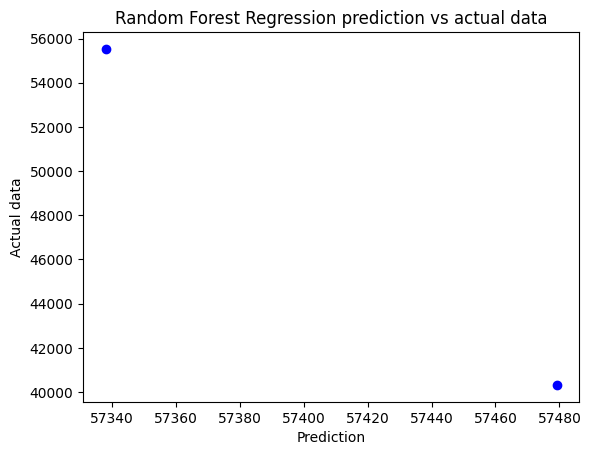

In [534]:
# Visualize y_pred against test_y
plt.scatter(y_pred_rfreg, test_y, color="blue")
plt.xlabel('Prediction')
plt.ylabel('Actual data')
plt.title('Random Forest Regression prediction vs actual data')
plt.show()

In [535]:
# print MAPE
print(f"Mean Absolute Percentage Error (MAPE): {mape_rfreg:.2f}%")

Mean Absolute Percentage Error (MAPE): 22.91%


In [536]:
'''
give a python code build Support Vector Regressor ML model on train data 
make prediction on test data, 
measure accurace with MAPE, 
a plot to visualise y_pred against test_y, 
and a kde plot to visualise the disturbution of a residual
'''

'\ngive a python code build Support Vector Regressor ML model on train data \nmake prediction on test data, \nmeasure accurace with MAPE, \na plot to visualise y_pred against test_y, \nand a kde plot to visualise the disturbution of a residual\n'

In [537]:
from sklearn.svm import SVR

In [538]:
# Build SVR model
model_svr= SVR()
model_svr.fit(train_x, train_y)

# Make predictions on test data
y_pred_svr = model_svr.predict(test_x)

In [539]:
# line 52
mape_svr= calculate_mape(test_y, y_pred_svr)

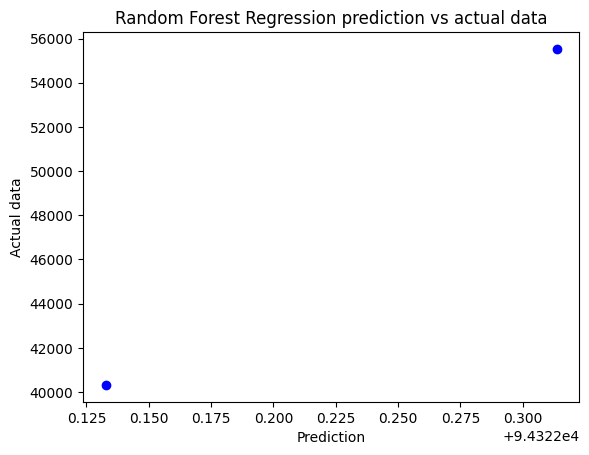

In [540]:
# Visualize y_pred against test_y
plt.scatter(y_pred_svr, test_y, color="blue")
plt.xlabel('Prediction')
plt.ylabel('Actual data')
plt.title('Random Forest Regression prediction vs actual data')
plt.show()

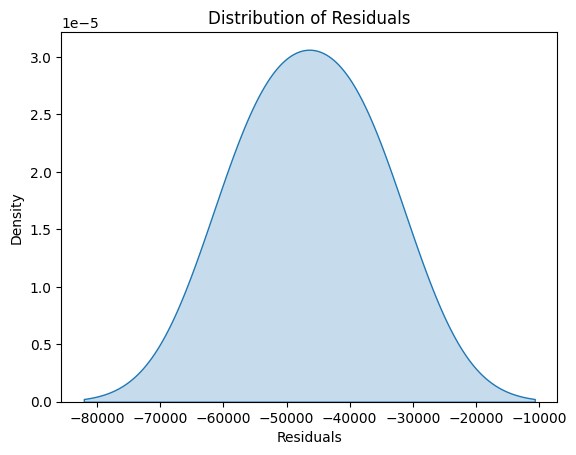

In [541]:
# Plot KDE of residuals
svr_residentual=test_y - y_pred_svr
sns.kdeplot(svr_residentual, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [542]:
# print MAPE
print(f"Mean Absolute Percentage Error (MAPE): {mape_svr:.2f}%")

Mean Absolute Percentage Error (MAPE): 101.90%


In [543]:
'''
Give me a python code build Xgboost Regressor ML model on train data, 
make prediction on test data, measure accurace with MAPE, a plot to visualize y_pred against test_y
and a kde plot to visualize the distirbution of a residual

'''

'\nGive me a python code build Xgboost Regressor ML model on train data, \nmake prediction on test data, measure accurace with MAPE, a plot to visualize y_pred against test_y\nand a kde plot to visualize the distirbution of a residual\n\n'

In [544]:
import xgboost as xgb

In [545]:
# pip install xgboost

In [546]:
# Train XGBoost model
model_xgboost = xgb.XGBRegressor()
model_xgboost .fit(train_x, train_y)

# Make predictions on test data
y_pred_xgbboost = model_xgboost .predict(test_x)

In [547]:
# line 52
mape_xgbboost= calculate_mape(test_y, y_pred_xgbboost)

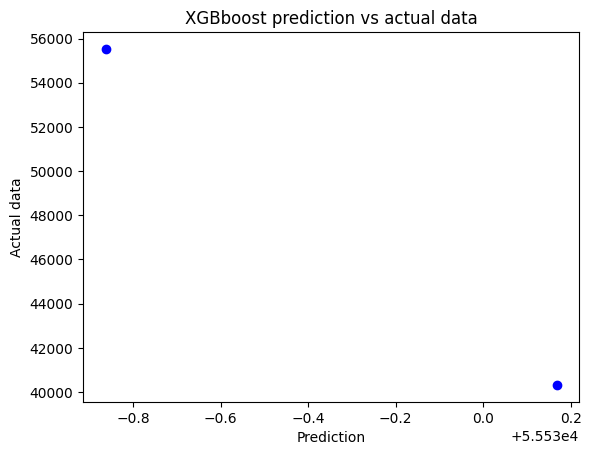

In [548]:
# Visualize y_pred against test_y
plt.scatter(y_pred_xgbboost, test_y, color="blue")
plt.xlabel('Prediction')
plt.ylabel('Actual data')
plt.title('XGBboost prediction vs actual data')
plt.show()

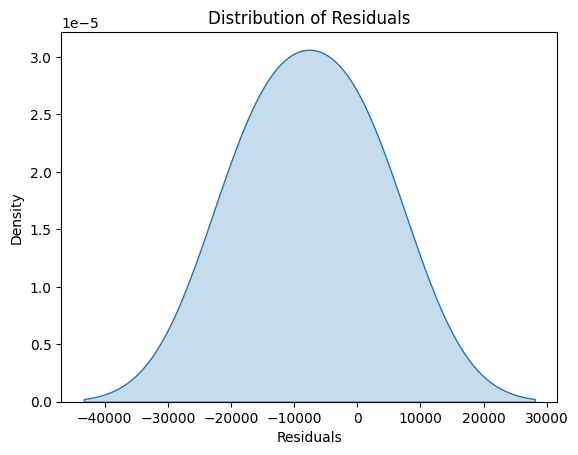

In [549]:
# Plot KDE of residuals
xgbboost_residentual=test_y - y_pred_xgbboost
sns.kdeplot(xgbboost_residentual, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [550]:
# print MAPE
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgbboost:.2f}%")

Mean Absolute Percentage Error (MAPE): 18.86%


In [551]:
prep_df.head()

,order_value_EUR,cost,date,customer_name,sales_manager,sales_rep,order_id,customer_type,Customer_Type_encoded,country_France,...,country_Sweden,country_UK,category_Appliances,category_Clothing,category_Electronics,category_Games,device_type_MAC,device_type_Mobile,device_type_PC,device_type_Tablet
0,98320.37,77722.25,8/23/2020,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,70-0511466,Loyal customer,1,0,...,1,0,0,0,0,1,0,0,0,1
1,46296.26,40319.41,5/15/2020,Wisoky Inc,Othello Bowes,Amelina Piscopiello,77-3489084,Regular customer,0,1,...,0,0,0,0,0,1,0,0,0,1
2,140337.34,115708.14,2020-04-09 00:00:00,Hegmann Group,Celine Tumasian,Corene Shirer,65-8218141,Loyal customer,1,0,...,0,0,1,0,0,0,0,0,1,0
3,203604.46,175344.16,6/26/2019,Kirlin and Sons,Othello Bowes,Crysta Halls,29-5478106,Loyal customer,1,1,...,0,0,0,0,1,0,0,1,0,0
4,63979.04,56032.84,10/22/2019,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,27-3437546,Regular customer,0,0,...,0,1,0,0,0,1,0,0,1,0


In [552]:
y_cat = prep_df['Customer_Type_encoded']

In [553]:
y_cat

0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    1
8    1
9    1
Name: Customer_Type_encoded, dtype: int64

In [554]:
# List of categorical variables to drop
categorical_vars_to_drop = ['date', 'customer_name', 'sales_manager', 'sales_rep', 'order_id', 'customer_type', 'Customer_Type_encoded']

# Drop the categorical variables from the DataFrame
x_cat = prep_df.drop(categorical_vars_to_drop, axis=1)
x_cat.columns

Index(['order_value_EUR', 'cost', 'country_France', 'country_Italy',
       'country_Korea', 'country_Portugal', 'country_Sweden', 'country_UK',
       'category_Appliances', 'category_Clothing', 'category_Electronics',
       'category_Games', 'device_type_MAC', 'device_type_Mobile',
       'device_type_PC', 'device_type_Tablet'],
      dtype='object')

In [555]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_cat = scaler.fit_transform(x_cat)
x_cat
scaled_cat 

array([[-0.33334695, -0.35176779, -0.5       , -0.33333333, -0.33333333,
        -0.33333333,  1.22474487, -0.33333333, -0.33333333, -0.81649658,
        -0.33333333,  1.22474487, -0.33333333, -0.33333333, -1.22474487,
         2.        ],
       [-0.3350829 , -0.80601252,  2.        , -0.33333333, -0.33333333,
        -0.33333333, -0.81649658, -0.33333333, -0.33333333, -0.81649658,
        -0.33333333,  1.22474487, -0.33333333, -0.33333333, -1.22474487,
         2.        ],
       [-0.33194493,  0.10955789, -0.5       , -0.33333333, -0.33333333,
         3.        , -0.81649658, -0.33333333,  3.        , -0.81649658,
        -0.33333333, -0.81649658, -0.33333333, -0.33333333,  0.81649658,
        -0.5       ],
       [-0.32983382,  0.83381702,  2.        , -0.33333333, -0.33333333,
        -0.33333333, -0.81649658, -0.33333333, -0.33333333, -0.81649658,
         3.        , -0.81649658, -0.33333333,  3.        , -1.22474487,
        -0.5       ],
       [-0.33449286, -0.61517828, -0

In [556]:
# Split the data into training and testing sets
train_x_cat, test_x_cat, train_y_cat, test_y_cat = train_test_split(scaled_cat, y_cat, test_size=0.2, random_state=42)


In [557]:
'''
give me a python code builld Logistic classification ML model on train data,
make prediction on test data,
accuracy classification table and
a graph to visualize the table, 
and percentage of error in a prediction

'''

'\ngive me a python code builld Logistic classification ML model on train data,\nmake prediction on test data,\naccuracy classification table and\na graph to visualize the table, \nand percentage of error in a prediction\n\n'

In [558]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [559]:
 # Building the Logistic Regression model
model = LogisticRegression()
model.fit(train_x_cat, train_y_cat)
 
# Making predictions on the test data
y_pred= model.predict(test_x_cat)
 

In [560]:
# Generate accuracy classification table
confusion = confusion_matrix(test_y_cat, y_pred)
accuracy = accuracy_score(test_y_cat, y_pred)

In [561]:
confusion

array([[0, 1],
       [0, 1]], dtype=int64)

In [562]:
accuracy

0.5

Text(50.722222222222214, 0.5, 'True labels')

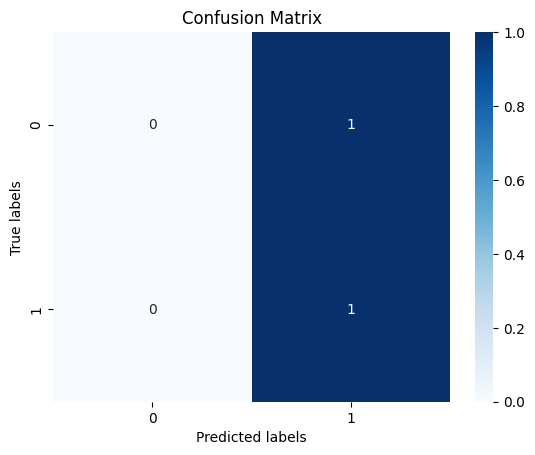

In [563]:
# Visualize the accuracy classification table
fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, cmap="Blues", fmt='d', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [564]:
# Calculate percentage of error in predictions
error_percentage = (1 - accuracy) * 100
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Percentage: {error_percentage: .2f}%")

plt.show()

Accuracy: 0.50
Error Percentage:  50.00%


In [565]:
from sklearn.tree import DecisionTreeClassifier

In [566]:
# Build Decision Tree Classification model
model_descTree = DecisionTreeClassifier()
model_descTree.fit(train_x_cat, train_y_cat)

# Make predictions on test data
y_pred_descTree = model.predict(test_x_cat)

In [567]:
y_pred_descTree

array([1, 1], dtype=int64)

In [568]:
# Generate accuracy classification table
confusion_decTree = confusion_matrix(test_y_cat, y_pred_descTree)
accuracy_decTree = accuracy_score(test_y_cat, y_pred_descTree)

Text(50.722222222222214, 0.5, 'True labels')

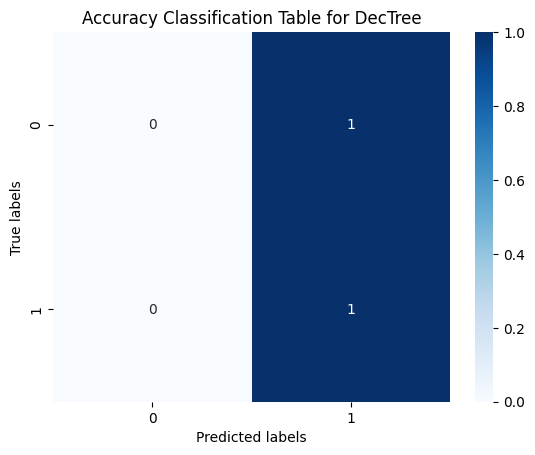

In [569]:
# Visualize the accuracy classification table
fig, ax = plt.subplots()
sns.heatmap(confusion_decTree, annot=True, cmap="Blues", fmt='d', ax=ax)
ax.set_title('Accuracy Classification Table for DecTree')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [570]:
# Calculate percentage of error in predictions
error_percentage_decTree = (1 - accuracy_decTree) * 100
print(f"Accuracy: {accuracy_decTree:.2f}")
print(f"Error Percentage: {error_percentage_decTree: .2f}%")

plt.show()

Accuracy: 0.50
Error Percentage:  50.00%


In [571]:
# Give me a python code build Random Forest classification ML modelon train data, 
# make prediction on test data, measure accuracy with MAPE, a plot to visualize y_pred against test_y
# and kde plot to visualize the disturbution of a residual

In [572]:
from sklearn.ensemble import RandomForestClassifier

In [573]:
# Assuming you have train_X, train_y, test_X, test_y as your train and test data
# train_X and test_X should be numpy arrays with features, train_y and test_y should be numpy arrays with labels

# Build Random Forest classification model
model_rfcl = RandomForestClassifier()
model_rfcl.fit(train_x_cat, train_y_cat)

# Make predictions on test data
y_pred_rfcl= model_rfcl.predict(test_x_cat)


In [574]:
# Generate accuracy classification table
confusion_rfcl = confusion_matrix(test_y_cat, y_pred_rfcl)
accuracy_rfcl = accuracy_score(test_y_cat, y_pred_rfcl)

Text(50.722222222222214, 0.5, 'True labels')

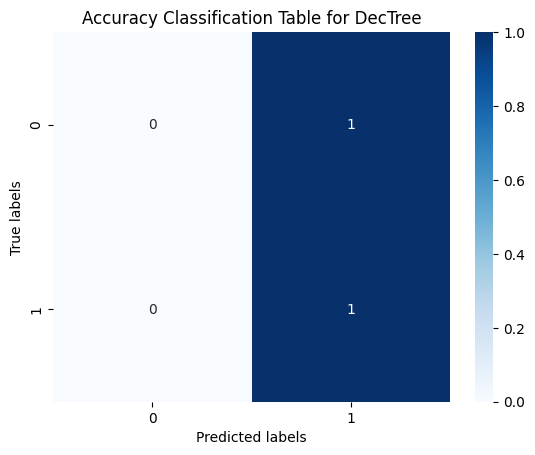

In [575]:
# Visualize the accuracy classification table
fig, ax = plt.subplots()
sns.heatmap(confusion_rfcl, annot=True, cmap="Blues", fmt='d', ax=ax)
ax.set_title('Accuracy Classification Table for DecTree')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [576]:
# Calculate percentage of error in predictions
error_percentage_rfcl= (1 - accuracy_decTree) * 100
print(f"Accuracy: {accuracy_rfcl:.2f}")
print(f"Error Percentage: {error_percentage_rfcl: .2f}%")

plt.show()

Accuracy: 0.50
Error Percentage:  50.00%


In [577]:
# Give me a python code with for loop to build KNN classification ML model on train data and 
# and make prediction on test data for various number of Ks with a line plot to show the accuracy rate based on 
# the number of K used.

# Then python code for accuracy classificaiton tableand a graph to visualize the table,
# and percentage of error in prediction

In [578]:
from sklearn.neighbors import KNeighborsClassifier

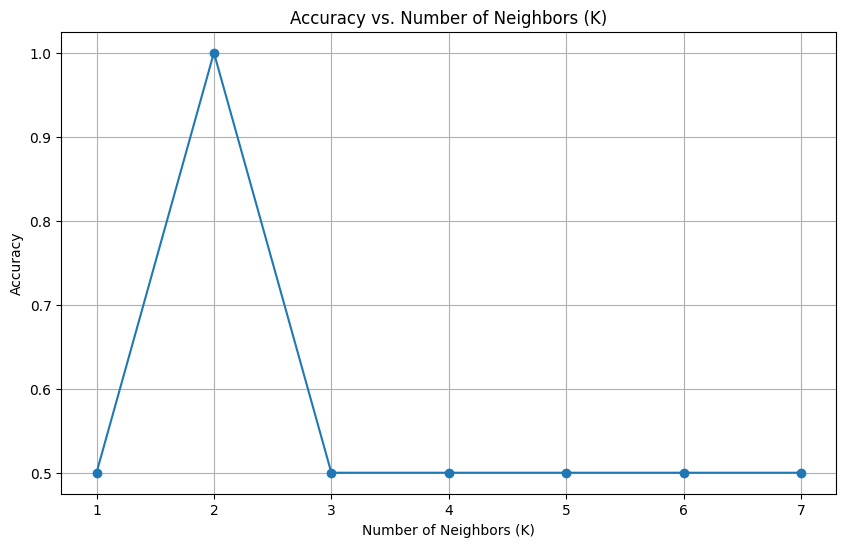

In [579]:
# Define a range of K values
k_values = list(range(1, min(11, len(train_x_cat))))  # Limit K values to the number of samples in training data

# Initialize lists to store accuracy scores
accuracy_results = []

# Iterate over different values of K
for k in k_values:
    # Build KNN classifier
    model = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    model.fit(train_x_cat, train_y_cat)
    
    # Check if the number of samples in the test set is greater than 0 before making predictions
    if len(test_x_cat) > 0:
        # Make predictions on the test data
        y_pred = model.predict(test_x_cat)
        # Calculate accuracy and store it
        accuracy = accuracy_score(test_y_cat, y_pred)
        accuracy_results.append(accuracy)
    else:
        # If the test set is empty, append NaN to accuracy results
        accuracy_results.append(np.nan)

# Plotting the accuracy rates based on the number of neighbors (K)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_results, marker='o')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()



In [580]:
best_k=2

In [581]:
model_KNN = KNeighborsClassifier(n_neighbors=best_k)
# Fit the classifier to the training data
model_KNN.fit(train_x_cat, train_y_cat)
y_pred_KNN = model_KNN.predict(test_x_cat)

In [582]:
# Generate accuracy classification table
confusion_KNN = confusion_matrix(test_y_cat, y_pred_KNN)
accuracy_KNN = accuracy_score(test_y_cat, y_pred_KNN)

Text(50.722222222222214, 0.5, 'True labels')

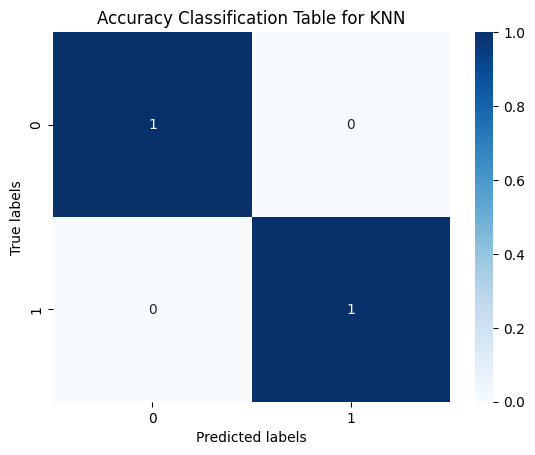

In [583]:
# Visualize the accuracy classification table
fig, ax = plt.subplots()
sns.heatmap(confusion_KNN, annot=True, cmap="Blues", fmt='d', ax=ax)
ax.set_title('Accuracy Classification Table for KNN')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [584]:
# Calculate percentage of error in predictions
error_percentage_KNN= (1 - accuracy_KNN) * 100
print(f"Accuracy: {accuracy_KNN:.2f}")
print(f"Error Percentage: {error_percentage_KNN: .2f}%")

plt.show()

Accuracy: 1.00
Error Percentage:  0.00%


In [585]:
'''
give me a python code build LightGBM classiication ML model on train data,
make prediction on test data, accuracy classification table 
and a graph tovisualize the table and percentage of error in prediction
'''

'\ngive me a python code build LightGBM classiication ML model on train data,\nmake prediction on test data, accuracy classification table \nand a graph tovisualize the table and percentage of error in prediction\n'

In [586]:
import lightgbm as lgb

In [587]:
# Create dataset for lightgbm
train_data = lgb.Dataset(train_x_cat, label=train_y_cat)

In [588]:
# Define LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_error',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [589]:
# Train the model
num_round = 100
model = lgb.train(params, train_data, num_round)

# Make prediction on the test data
y_pred_prob = model.predict(test_x_cat)
y_pred_light=(y_pred_prob >= 0.5).astype(int)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there ar

In [590]:
# Generate accuracy classification table
confusion_light = confusion_matrix(test_y_cat, y_pred_light)
accuracy_light = accuracy_score(test_y_cat, y_pred_light)

Text(50.722222222222214, 0.5, 'True labels')

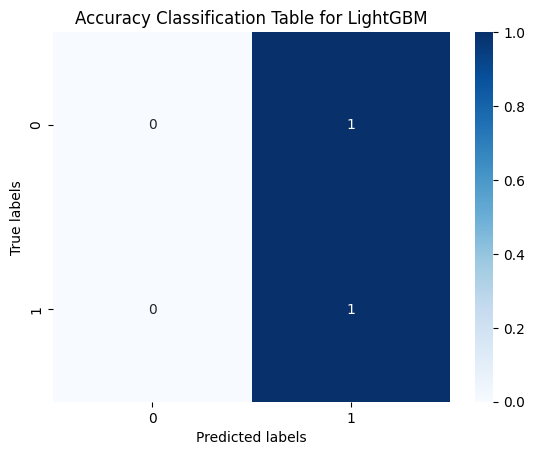

In [591]:
# Visualize the accuracy classification table
fig, ax = plt.subplots()
sns.heatmap(confusion_light, annot=True, cmap="Blues", fmt='d', ax=ax)
ax.set_title('Accuracy Classification Table for LightGBM')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [592]:
# Calculate percentage of error in predictions
error_percentage_light= (1 - accuracy_light) * 100
print(f"Accuracy: {accuracy_light:.2f}")
print(f"Error Percentage: {error_percentage_light: .2f}%")

plt.show()

Accuracy: 0.50
Error Percentage:  50.00%


In [593]:
sorted_pivot_table

,Median Cost,Count,Median Sales
customer_name,,,
Romaguera-Dietrich,55529.13,3,6.968143e+04
Kirlin and Sons,249788.24,2,5.009896e+07
Hegmann Group,115708.14,1,1.403373e+05
Konopelski LLC,77722.25,1,9.832037e+04
Labadie and Sons,110924.13,1,1.270754e+05
Schoen-Keeling,56032.84,1,6.397904e+04
Wisoky Inc,40319.41,1,4.629626e+04


In [597]:
'''
Give me a python code to perform Kmeans Cluster Analysis on three numeric variables like medial sales,
median cost and purchase frequency
'''

'\nGive me a python code to perform Kmeans Cluster Analysis on three numeric variables like medial sales,\nmedian cost and purchase frequency\n'

In [595]:
from sklearn.cluster import KMeans

In [596]:
# Initialize KMeans with the number of clusters you want
num_clusters = 2

In [602]:
# Extracting the features from the DataFrame
features = sorted_pivot_table

In [604]:
# Perform Kmeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
sorted_pivot_table['Cluster'] = kmeans.fit_predict(features)

In [605]:
sorted_pivot_table

,Median Cost,Count,Median Sales,Cluster
customer_name,,,,
Romaguera-Dietrich,55529.13,3,6.968143e+04,0
Kirlin and Sons,249788.24,2,5.009896e+07,1
Hegmann Group,115708.14,1,1.403373e+05,0
Konopelski LLC,77722.25,1,9.832037e+04,0
Labadie and Sons,110924.13,1,1.270754e+05,0
Schoen-Keeling,56032.84,1,6.397904e+04,0
Wisoky Inc,40319.41,1,4.629626e+04,0


In [606]:
sorted_pivot_table['Cluster'].value_counts()

Cluster
0    6
1    1
Name: count, dtype: int64

In [607]:
# Visualize the clusters
plt.figure(figsize=(8,6))

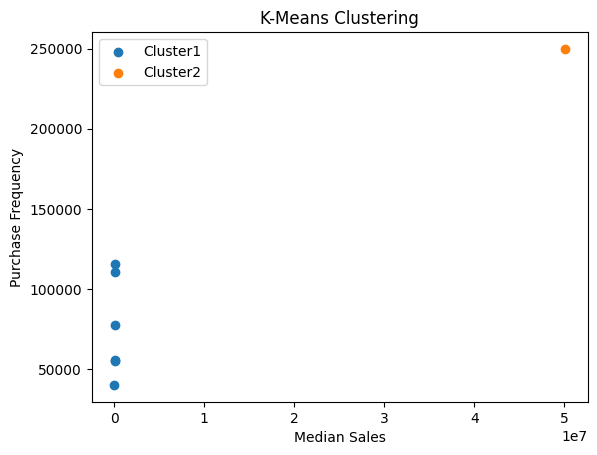

In [609]:
# Scatter plot of MedianSales vs. MedianCost, colored by closter
for cluster in range(num_clusters):
    plt.scatter(
        sorted_pivot_table[sorted_pivot_table['Cluster']== cluster]['Median Sales'],
        sorted_pivot_table[sorted_pivot_table['Cluster'] == cluster]['Median Cost'],
        label=f'Cluster{cluster +1}'
    )
plt.xlabel('Median Sales')
plt.ylabel('Purchase Frequency')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [613]:
sorted_pivot_table['Customer_Type']=sorted_pivot_table['Cluster'].replace({1:"Regular Customer", 0:"LoyalCustomer" })

In [614]:
sorted_pivot_table['Customer_Type']


customer_name
Romaguera-Dietrich       LoyalCustomer
Kirlin and Sons       Regular Customer
Hegmann Group            LoyalCustomer
Konopelski LLC           LoyalCustomer
Labadie and Sons         LoyalCustomer
Schoen-Keeling           LoyalCustomer
Wisoky Inc               LoyalCustomer
Name: Customer_Type, dtype: object

In [615]:
sorted_pivot_table

,Median Cost,Count,Median Sales,Cluster,Customer_Type
customer_name,,,,,
Romaguera-Dietrich,55529.13,3,6.968143e+04,0,LoyalCustomer
Kirlin and Sons,249788.24,2,5.009896e+07,1,Regular Customer
Hegmann Group,115708.14,1,1.403373e+05,0,LoyalCustomer
Konopelski LLC,77722.25,1,9.832037e+04,0,LoyalCustomer
Labadie and Sons,110924.13,1,1.270754e+05,0,LoyalCustomer
Schoen-Keeling,56032.84,1,6.397904e+04,0,LoyalCustomer
Wisoky Inc,40319.41,1,4.629626e+04,0,LoyalCustomer
